In [256]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


In [252]:
file_pi = open('./unknown_param_data-no-update/sample_error.pickle', 
                       'rb')
data = pickle.load(file_pi)
file_pi.close()

file_pi = open('./baseline_data/sample_error.pickle', 
                       'rb')
bl_data = pickle.load(file_pi)
file_pi.close()

file_pi = open('./baseline_data-inc-param/sample_error.pickle', 
                       'rb')
bl_inc_data = pickle.load(file_pi)
file_pi.close()

file_pi = open('./unknown_param_data-update/sample_error.pickle', 
                       'rb')
upd_data = pickle.load(file_pi)
file_pi.close()

file_pi = open('./unknown_param_data-update/estimation_data.pickle',
                        'rb')
est_data = pickle.load(file_pi)
file_pi.close()


In [253]:
mean_cost = np.mean(data, axis=0)
std_cost = np.std(data, axis=0)
mean_upd_cost = np.mean(upd_data, axis=0)
std_upd_cost = np.std(upd_data, axis=0)
bl_mean_cost = np.mean(bl_data, axis=0)
bl_std_cost = np.std(bl_data, axis=0)
bl_inc_mean_cost = np.mean(bl_inc_data, axis=0)
bl_inc_std_cost = np.std(bl_inc_data, axis=0)

In [254]:
mass = []
mass_variance = []
for i in range(len(est_data)):
    mass.append(
            est_data[i]['mean mass']
    )
    mass_variance.append(
        np.sqrt(est_data[i]['var mass'].ravel())
    )

## make this into a numpy array
mass = np.array(mass)
mass_variance = np.array(mass_variance).flatten()

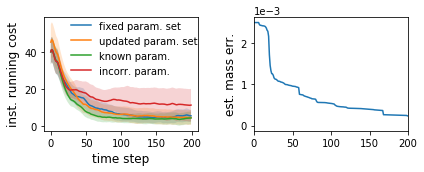

In [278]:
t = [i for i in range(len(mean_cost))]

plt.figure(figsize=(6,2.5))

ax = plt.subplot(1,2,1)

ax.plot(t, mean_cost, label='fixed param. set')
ax.plot(t, mean_upd_cost, label='updated param. set')
ax.plot(t, bl_mean_cost, label='known param.')
ax.plot(t, bl_inc_mean_cost, label='incorr. param.')
ax.fill_between(t, 
                 mean_cost-0.5 * std_cost, 
                 mean_cost+0.5*std_cost,alpha=0.2)
ax.fill_between(t, 
                 mean_upd_cost-0.5 * std_upd_cost, 
                 mean_upd_cost+0.5*std_upd_cost,alpha=0.2)
ax.fill_between(t, 
                 bl_mean_cost-0.5 * bl_std_cost, 
                 bl_mean_cost+0.5*bl_std_cost,alpha=0.2)
ax.fill_between(t, 
                 bl_inc_mean_cost-0.5 * bl_inc_std_cost, 
                 bl_inc_mean_cost+0.5*bl_inc_std_cost,alpha=0.2)

ax.legend(fontsize=10, loc=(0.15,0.45), framealpha=0)

ax.set_ylabel('inst. running cost', fontsize=12)

ax.set_xlabel('time step', fontsize=12)

ax = plt.subplot(1,2,2)

ax.ticklabel_format(style='sci',scilimits=(-3,2), axis='y')


sampling_iter = [i for i in range(len(mass))]
mass_err = np.square(mass - 0.5)
ax.plot(sampling_iter, mass_err)
#ax.fill_between(sampling_iter, 
#                 mass_err - 0.5*np.square(mass_variance), 
#                 mass_err + 0.5*np.square(mass_variance), alpha=0.2)
ax.set_ylabel('est. mass err.', fontsize=12)
ax.set_xlim(0,200)


plt.tight_layout()

#plt.ylim(0, 0.002)
plt.savefig('manip-comparison.pdf')
